In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC

In [3]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)] # petal length, petal width
y=(iris["target"]==2).astype(np.float64) #iris virginica

svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])

svm_clf.fit(X,y)
print(svm_clf.predict([[5.5,1.7]]))

[1.]


In [8]:
X,y=datasets.make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf=Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge",max_iter=10000))
])
polynomial_svm_clf.fit(X,y)
preds=polynomial_svm_clf.predict(X)


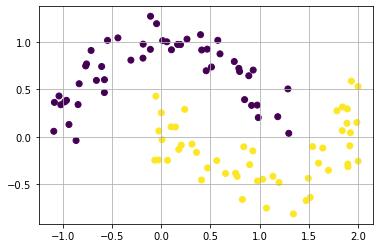

In [14]:
plt.scatter(X[:,0],X[:,1],c=preds)
plt.grid(True)

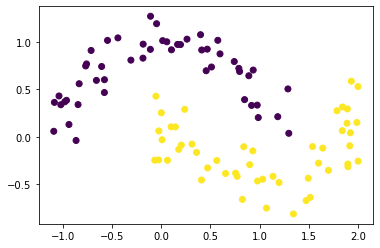

In [16]:
poly_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5,max_iter=10000))
])
poly_kernel_svm_clf.fit(X,y)
preds=poly_kernel_svm_clf.predict(X)
plt.scatter(X[:,0],X[:,1],c=preds)